In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('cancer-probabilities.csv')

In [3]:
print(data.head(5))

   Sr No. Smoking Habit Drinking Habit Biking Habit Walking Habit  \
0       1         Heavy       Frequent          Low           Low   
1       2    Occasional       Moderate         High          High   
2       3           NaN            NaN         High          High   
3       4         Heavy       Frequent          Low           Low   
4       5      Moderate     Occasional       Medium        Medium   

  Jogging Habit  Probability of Cancer  
0           Low                    0.8  
1          High                    0.2  
2          High                    0.1  
3           Low                    0.9  
4        Medium                    0.4  


In [4]:
# Data Preprocessing
data.isnull().sum()

Sr No.                    0
Smoking Habit            16
Drinking Habit           16
Biking Habit              0
Walking Habit             0
Jogging Habit             0
Probability of Cancer     0
dtype: int64

In [5]:
data['Smoking Habit'] = data['Smoking Habit'].replace({np.nan:'No-Smoking'})

In [6]:
data['Drinking Habit'] = data['Drinking Habit'].replace({np.nan:'No-Drinking'})

In [7]:
data.isnull().sum()

Sr No.                   0
Smoking Habit            0
Drinking Habit           0
Biking Habit             0
Walking Habit            0
Jogging Habit            0
Probability of Cancer    0
dtype: int64

Exploratory Data Analysis (EDA)

In [8]:
# Summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sr No.,50.0,25.5000,14.577380,1.00,13.25,25.500,37.75,50.0
Probability of Cancer,50.0,0.4072,0.325501,0.01,0.05,0.375,0.75,0.9


In [9]:
data.dtypes

Sr No.                     int64
Smoking Habit             object
Drinking Habit            object
Biking Habit              object
Walking Habit             object
Jogging Habit             object
Probability of Cancer    float64
dtype: object

In [10]:
data['Smoking Habit'].value_counts()

Smoking Habit
Heavy         17
No-Smoking    16
Moderate      16
Occasional     1
Name: count, dtype: int64

In [11]:
data['Smoking Habit'].value_counts()

Smoking Habit
Heavy         17
No-Smoking    16
Moderate      16
Occasional     1
Name: count, dtype: int64

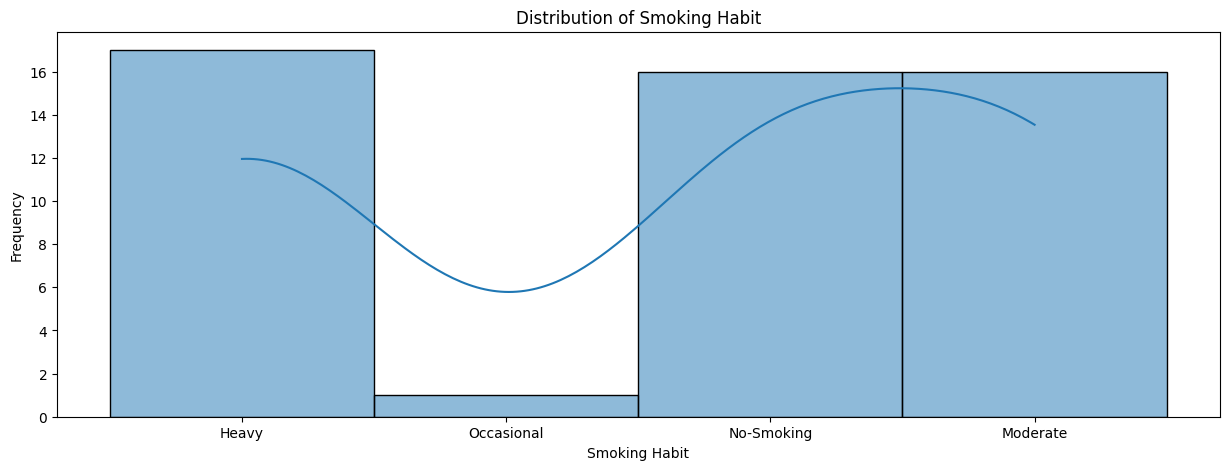

In [12]:
# Distribution of smoking habit
plt.figure(figsize=(15, 5))
sns.histplot(data['Smoking Habit'], kde=True, bins=20)
plt.title('Distribution of Smoking Habit')
plt.xlabel('Smoking Habit')
plt.ylabel('Frequency')
plt.show()

In [13]:
data['Drinking Habit'].value_counts()

Drinking Habit
Frequent       17
No-Drinking    16
Occasional     16
Moderate        1
Name: count, dtype: int64

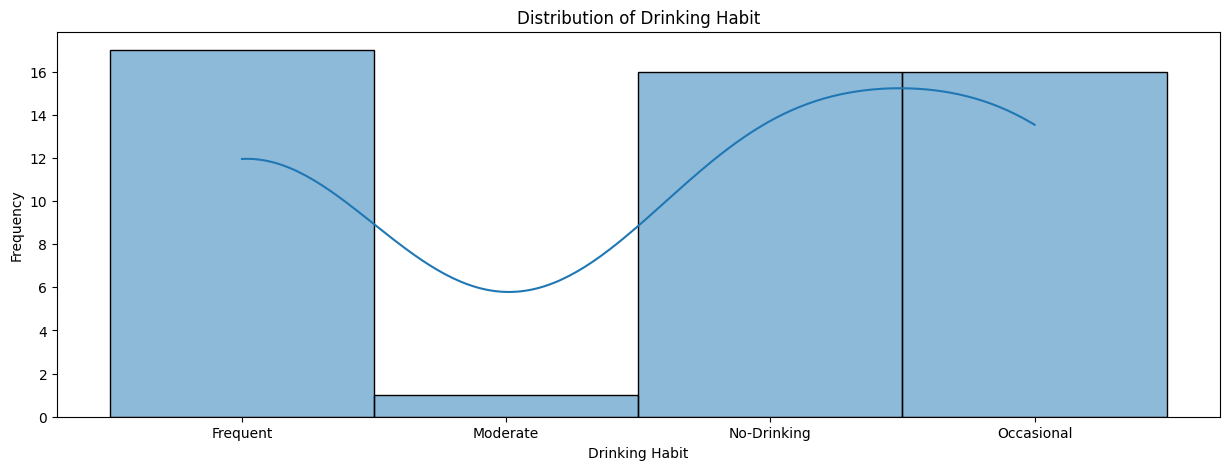

In [14]:
# Distribution of drinking habit
plt.figure(figsize=(15, 5))
sns.histplot(data['Drinking Habit'], kde=True, bins=20)
plt.title('Distribution of Drinking Habit')
plt.xlabel('Drinking Habit')
plt.ylabel('Frequency')
plt.show()

In [15]:
data['Biking Habit'].value_counts()

Biking Habit
Low       17
High      17
Medium    16
Name: count, dtype: int64

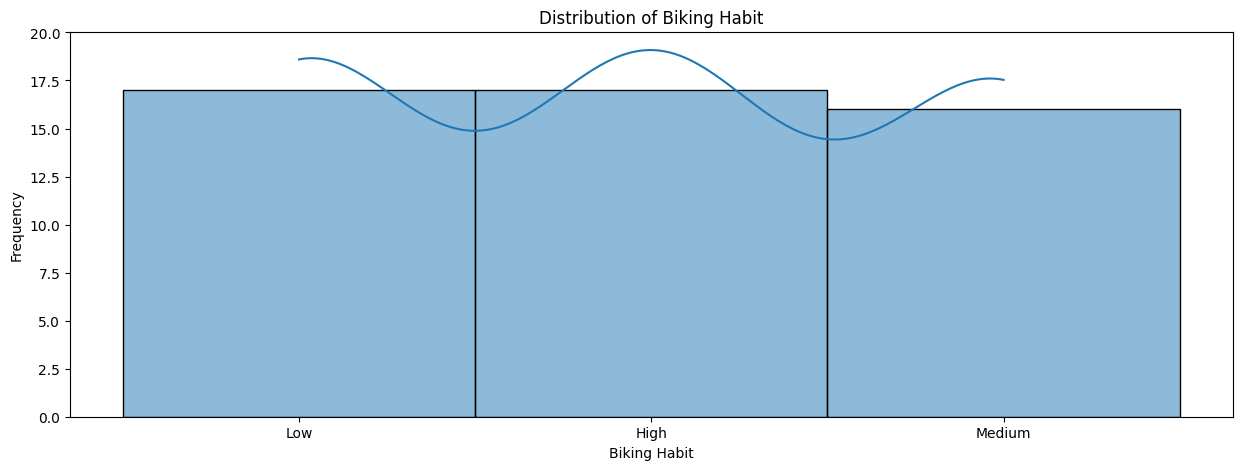

In [16]:
# Distribution of biking habit
plt.figure(figsize=(15, 5))
sns.histplot(data['Biking Habit'], kde=True, bins=20)
plt.title('Distribution of Biking Habit')
plt.xlabel('Biking Habit')
plt.ylabel('Frequency')
plt.show()

In [17]:
data['Walking Habit'].value_counts()

Walking Habit
Low       17
High      17
Medium    16
Name: count, dtype: int64

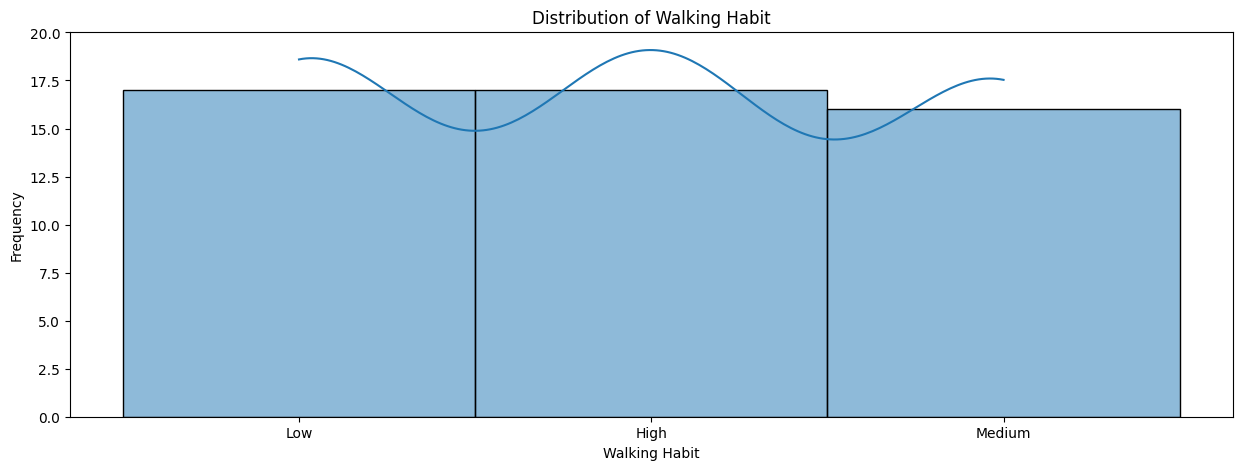

In [18]:
# Distribution of walking habit
plt.figure(figsize=(15, 5))
sns.histplot(data['Walking Habit'], kde=True, bins=20)
plt.title('Distribution of Walking Habit')
plt.xlabel('Walking Habit')
plt.ylabel('Frequency')
plt.show()

In [19]:
data['Jogging Habit'].value_counts()

Jogging Habit
Low       17
High      17
Medium    16
Name: count, dtype: int64

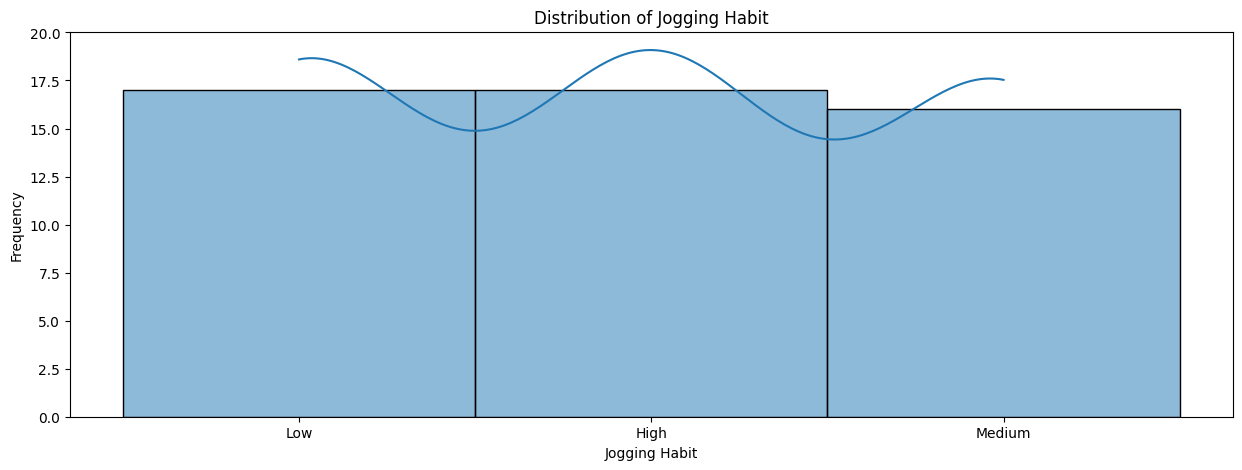

In [20]:
# Distribution of jogging habit
plt.figure(figsize=(15, 5))
sns.histplot(data['Jogging Habit'], kde=True, bins=20)
plt.title('Distribution of Jogging Habit')
plt.xlabel('Jogging Habit')
plt.ylabel('Frequency')
plt.show()

Data Transformation

In [21]:
# converting object data type to floats
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
obj = data.select_dtypes(include='object')
num = data.select_dtypes(exclude='object')

for i in range(0, obj.shape[1]):
    obj.iloc[:,i] = le.fit_transform(obj.iloc[:,i])

obj = obj.astype("int")
data = pd.concat([obj, num], axis=1)

In [115]:
data.sample(3)

,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Sr No.,Probability of Cancer
2,2,2,0,0,0,3,0
33,0,0,1,1,1,34,1
5,2,2,0,0,0,6,0


In [120]:
threshold = 0.5
data['Probability of Cancer'] = (data['Probability of Cancer'] > threshold).astype(int)

Correlation matrix to analyze relationships

In [121]:
correlation_matrix = data.corr()

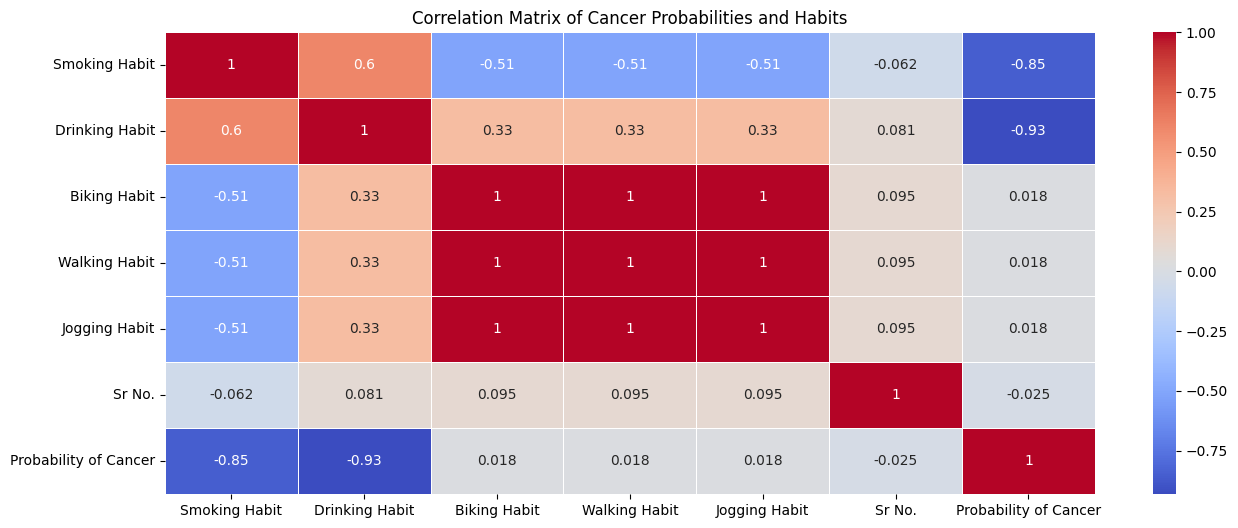

In [122]:
# Plotting the correlation heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Cancer Probabilities and Habits')
plt.show()

This shows how different habits (smoking, drinking, biking, etc.) are correlated with the probability of cancer. A strong positive correlation mean that as the habit increases (e.g., smoking more), the probability of cancer increases.

In [119]:
# Correlation with target
print(correlation_matrix['Probability of Cancer'].sort_values(ascending=False))

Probability of Cancer    1.000000
Biking Habit             0.017675
Walking Habit            0.017675
Jogging Habit            0.017675
Sr No.                  -0.024868
Smoking Habit           -0.851274
Drinking Habit          -0.932252
Name: Probability of Cancer, dtype: float64


A higher correlation value (closer to 1 or -1) suggests a stronger relationship between a feature and the target.

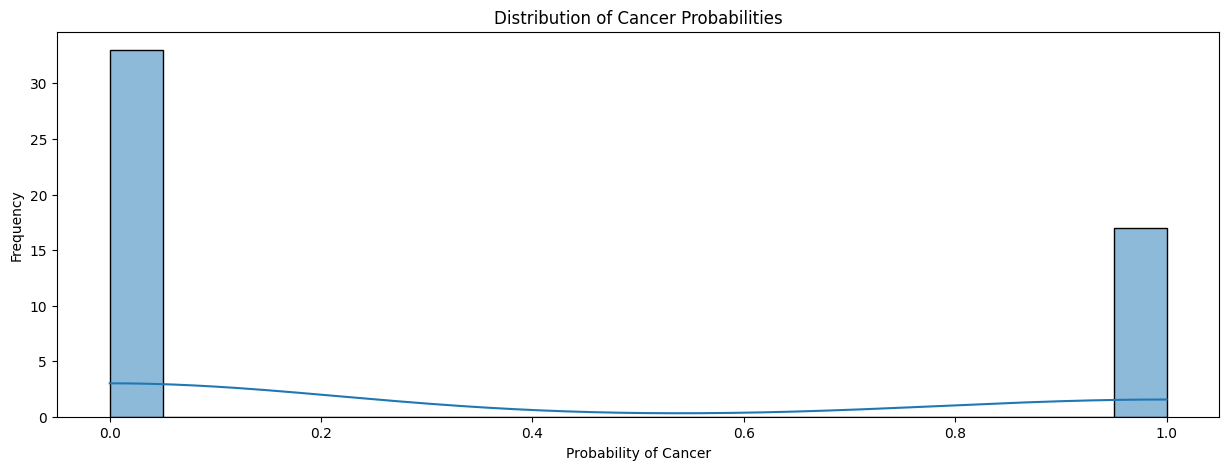

In [27]:
# Distribution of cancer probabilities
plt.figure(figsize=(15, 5))
sns.histplot(data['Probability of Cancer'], kde=True, bins=20)
plt.title('Distribution of Cancer Probabilities')
plt.xlabel('Probability of Cancer')
plt.ylabel('Frequency')
plt.show()

Cancer probabilities are skewed.

Visualizations for Each Habit and Cancer Probability

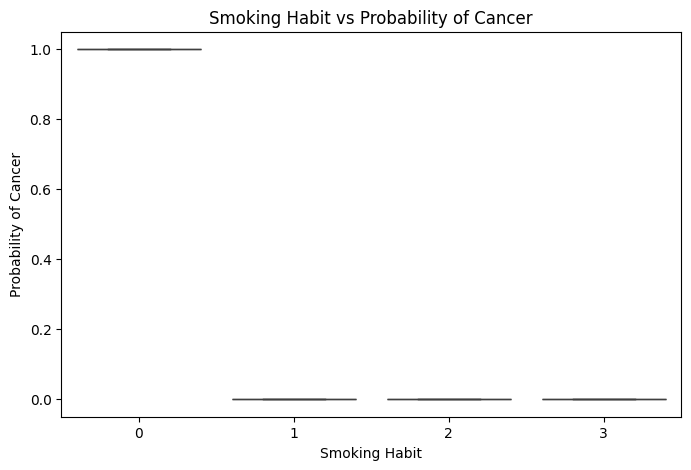

In [28]:
# Smoking Habit vs Probability of Cancer
plt.figure(figsize=(8, 5))
sns.boxplot(x='Smoking Habit', y='Probability of Cancer', data=data)
plt.title('Smoking Habit vs Probability of Cancer')
plt.show()

1 means a 100% probability and 0 means no probability

For individuals with a smoking habit of 0 (Heavy smokers), the probability of cancer is 1, suggesting a high risk.

For smoking habits 1, 2, and 3, the probability of cancer seems to be close to 0. 

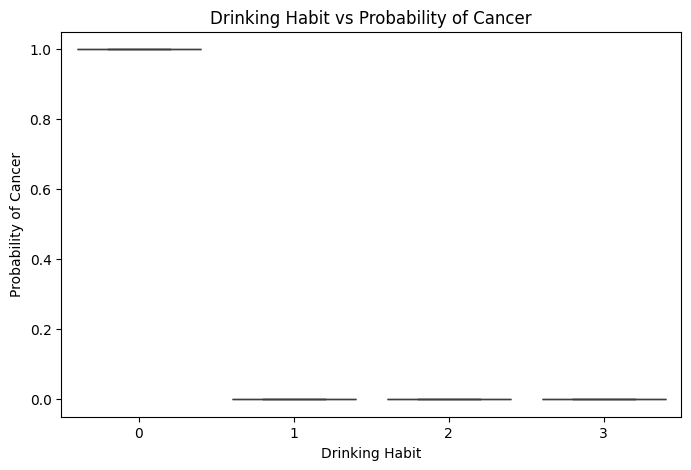

In [29]:
# Drinking Habit vs Probability of Cancer
plt.figure(figsize=(8, 5))
sns.boxplot(x='Drinking Habit', y='Probability of Cancer', data=data)
plt.title('Drinking Habit vs Probability of Cancer')
plt.show()

For individuals with a drinking habit of 0 (Frequent), the probability of cancer is 1, suggesting a high risk.

For drinking habits 1, 2, and 3, the probability of cancer seems to be close to 0.

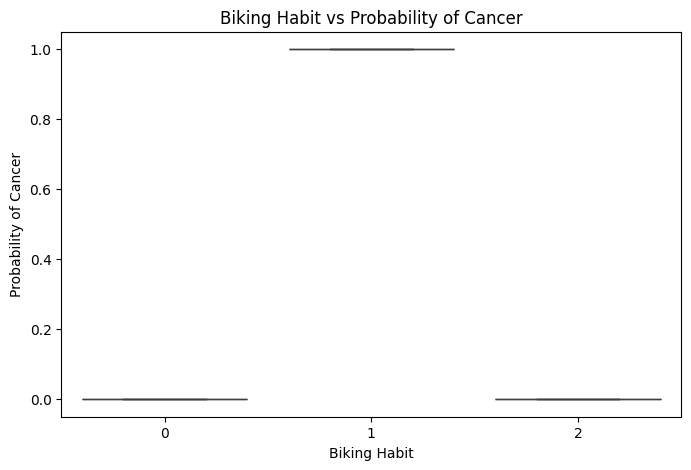

In [30]:
# Biking Habit vs Probability of Cancer
plt.figure(figsize=(8, 5))
sns.boxplot(x='Biking Habit', y='Probability of Cancer', data=data)
plt.title('Biking Habit vs Probability of Cancer')
plt.show()

For individuals with a Biking habit of 1 (Low), the probability of cancer is 1, suggesting a high risk.

For Biking habits 0 and 2, the probability of cancer seems to be close to 0.

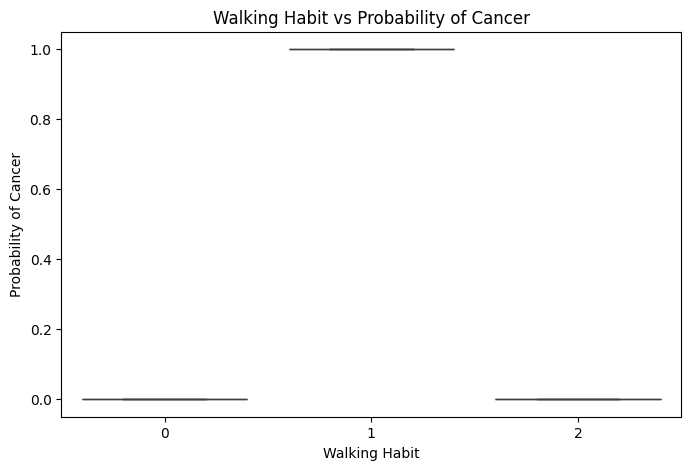

In [31]:
# Walking Habit vs Probability of Cancer
plt.figure(figsize=(8, 5))
sns.boxplot(x='Walking Habit', y='Probability of Cancer', data=data)
plt.title('Walking Habit vs Probability of Cancer')
plt.show()

For individuals with a walking habit of 1 (Low), the probability of cancer is 1, suggesting a high risk.

For walking habits 0 and 2, the probability of cancer seems to be close to 0.

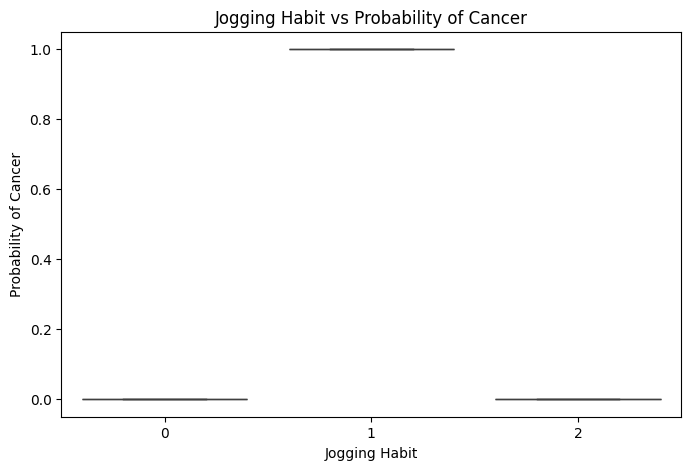

In [32]:
# Jogging Habit vs Probability of Cancer
plt.figure(figsize=(8, 5))
sns.boxplot(x='Jogging Habit', y='Probability of Cancer', data=data)
plt.title('Jogging Habit vs Probability of Cancer')
plt.show()

For individuals with a jogging habit of 1 (Low), the probability of cancer is 1, suggesting a high risk.

For jogging habits 0 and 2, the probability of cancer seems to be close to 0.

Logistic Regression

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [69]:
# Features and target variable
X = data[['Smoking Habit', 'Drinking Habit', 'Biking Habit', 'Walking Habit', 'Jogging Habit']]
y = data['Probability of Cancer']

In [70]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Model: Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [72]:
# Predictions
y_pred = model.predict(X_test)

In [73]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [74]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Confusion Matrix:
 [[6 0]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Accuracy: The accuracy score tells us how well the model is predicting cancer probabilities based on the habits. Higher accuracy indicates better performance.

Confusion Matrix: This matrix shows the true positives, true negatives, false positives, and false negatives, helping to understand where the model performs well and where it struggles.

Classification Report: The precision, recall, and F1-score provides detailed insights into the model’s performance for each class (likelihood of cancer).

Feature Importance Analysis

In [75]:
# Get the coefficients from the logistic regression model
importance = model.coef_[0]

In [76]:
# Create a dataframe for better visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

In [77]:
# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [78]:
print(feature_importance)

          Feature  Importance
2    Biking Habit    0.081081
3   Walking Habit    0.081081
4   Jogging Habit    0.081081
0   Smoking Habit   -1.227135
1  Drinking Habit   -1.806197


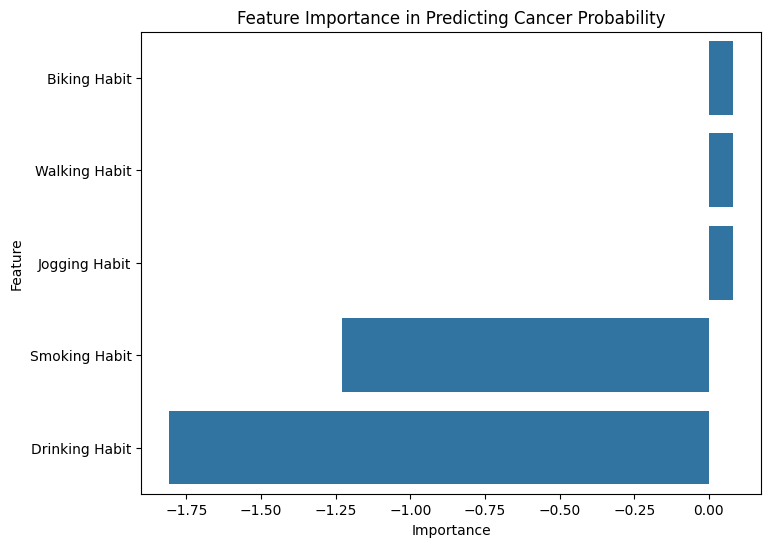

In [114]:
# Visualizing feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Predicting Cancer Probability')
plt.show()

Negative Coefficients: Features with Negative coefficients increase the likelihood of cancer. For example, smoking has a high negative coefficient, it means smoking increases cancer risk.

Positive Coefficients: Features with positive coefficients decrease the likelihood of cancer. For instance, jogging shows a positive coefficient, indicating that jogging habit reduces cancer risk.

In [80]:
# Check if features need encoding (for categorical features)
from sklearn.preprocessing import LabelEncoder

In [81]:
# Encode categorical variables if any
for column in ['Smoking Habit', 'Drinking Habit', 'Biking Habit', 'Walking Habit', 'Jogging Habit']:
    if data[column].dtype == 'object':  # If the feature is categorical
        data[column] = LabelEncoder().fit_transform(data[column])

In [82]:
# Now let's proceed to compute feature importance again using Random Forest
from sklearn.ensemble import RandomForestClassifier

In [83]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
# Get feature importance
importances = rf_model.feature_importances_
feature_names = X_train.columns

In [85]:
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

          Feature  Importance
1  Drinking Habit    0.406153
0   Smoking Habit    0.391979
4   Jogging Habit    0.081160
2    Biking Habit    0.064076
3   Walking Habit    0.056633


Model Tuning with Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
# Model: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [88]:
# Predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

In [89]:
# Random Forest Model Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

In [90]:
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Classification Report:\n", class_report_rf)

Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
 [[6 0]
 [0 4]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Model Tuning with Hyperparameter Optimization

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [93]:
# Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [94]:
# Best parameters and evaluation
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
class_report_best_rf = classification_report(y_test, y_pred_best_rf)

In [95]:
print("Tuned Random Forest Accuracy:", accuracy_best_rf)
print("Tuned Random Forest Confusion Matrix:\n", conf_matrix_best_rf)
print("Tuned Random Forest Classification Report:\n", class_report_best_rf)

Tuned Random Forest Accuracy: 1.0
Tuned Random Forest Confusion Matrix:
 [[6 0]
 [0 4]]
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Support Vector Machine (SVM)

In [96]:
from sklearn.svm import SVC

In [97]:
# Model: Support Vector Machine
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [98]:
# Predictions with SVM
y_pred_svm = svm_model.predict(X_test)

In [99]:
# SVM Model Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Confusion Matrix:\n", conf_matrix_svm)
print("SVM Classification Report:\n", class_report_svm)

SVM Accuracy: 1.0
SVM Confusion Matrix:
 [[6 0]
 [0 4]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Gradient Boosting Classifier

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
# Model: Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [102]:
# Predictions with Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

In [103]:
# Gradient Boosting Model Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

In [104]:
print("Gradient Boosting Accuracy:", accuracy_gb)
print("Gradient Boosting Confusion Matrix:\n", conf_matrix_gb)
print("Gradient Boosting Classification Report:\n", class_report_gb)

Gradient Boosting Accuracy: 1.0
Gradient Boosting Confusion Matrix:
 [[6 0]
 [0 4]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



K-Nearest Neighbors (KNN)

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
# Model: K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [107]:
# Predictions with KNN
y_pred_knn = knn_model.predict(X_test)

In [108]:
# KNN Model Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)
print("KNN Confusion Matrix:\n", conf_matrix_knn)
print("KNN Classification Report:\n", class_report_knn)

KNN Accuracy: 1.0
KNN Confusion Matrix:
 [[6 0]
 [0 4]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [109]:
# Create a comparison DataFrame for model performance
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Tuned Random Forest', 'SVM', 'Gradient Boosting', 'KNN'],
    'Accuracy': [accuracy, accuracy_rf, accuracy_best_rf, accuracy_svm, accuracy_gb, accuracy_knn]
})

In [110]:
# Sort models by accuracy
model_performance = model_performance.sort_values(by='Accuracy', ascending=False)
print(model_performance)

                 Model  Accuracy
0  Logistic Regression       1.0
1        Random Forest       1.0
2  Tuned Random Forest       1.0
3                  SVM       1.0
4    Gradient Boosting       1.0
5                  KNN       1.0


Logistic Regression: Simple model, gives insights into feature importance, and is usually the baseline for comparison.

Random Forest: Expected to perform better than Logistic Regression by capturing non-linear relationships.

Tuned Random Forest: Hyperparameter tuning can further improve Random Forest performance.

SVM: Works well in high-dimensional spaces and when the classes are separable. Linear SVM is usually faster but may not perform well on complex datasets.

Gradient Boosting: Typically offers high performance for classification tasks but may take longer to train.

KNN: A simple model that often works well when the data distribution is simple, but it may struggle with large datasets.

Visualization of Model Comparison
We can visualize the model performance to get a clear picture of how they compare:

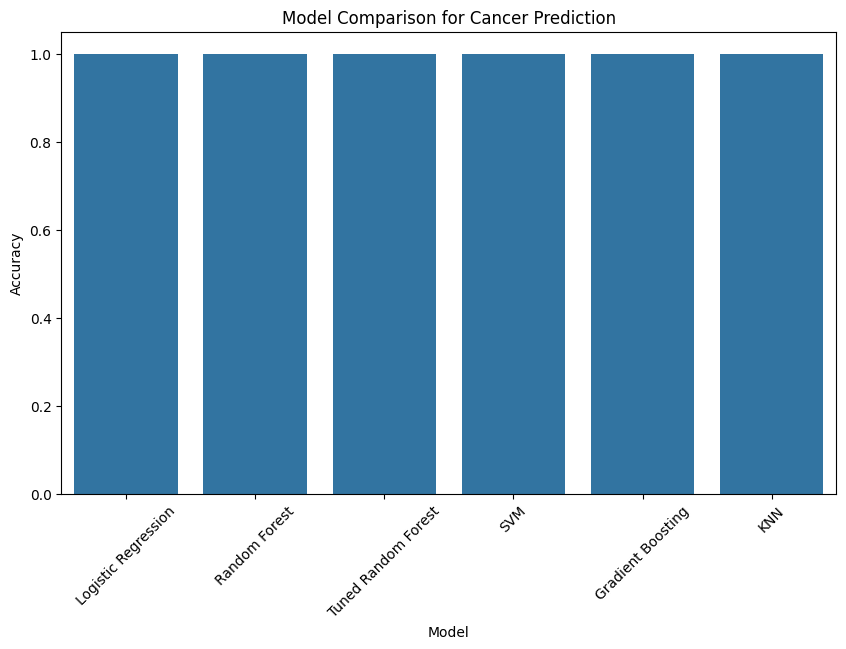

In [112]:
# Visualizing model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_performance)
plt.title('Model Comparison for Cancer Prediction')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

All of them performed equally